<a href="https://colab.research.google.com/github/DongWooLeee/Tobigs19/blob/main/week3_NeuralNetworkBasic_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # Neural Network Basic - Week3 과제


## Import Library

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
sys.path.append('./drive/MyDrive/과제/Week3_NN/dataset/mnist.py')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
%cd /content/drive/MyDrive/과제/Week3_NN/dataset/

/content/drive/MyDrive/과제/Week3_NN/dataset


In [ ]:
!python mnist.py install

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
from mnist import load_mnist

## Load Dataset
- MNIST 

In [ ]:
(X_train, Y_train), (X_test, Y_test) = \
    load_mnist(normalize=True, one_hot_label=False)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_train shape: {Y_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)
Y_train shape: (60000,)
Y_train shape: (10000,)


## Activation Function 
- sigmoid & relu : hidden layer activation function 
- softmax : output layer activation function 

In [ ]:
class sigmoid:
    # sigmoid 함수를 작성하세요 
    def forward(x):
        return 1/(1+np.exp(-x))
    
    # sigmoid 함수의 미분을 작성하세요
    def backward(x):
        return np.exp(-x)/(1+np.exp(-x))**2

In [ ]:
class relu:
    # relu 함수를 작성하세요
    def forward(x):
        return np.max(0,x)
    
    # relu 함수의 미분을 작성하세요
    def backward(x):
        return 1 if x>0 else 0

In [ ]:
class softmax:
    def forward(z):
        y = []
        for zi in z:
            c = np.max(zi)
            exp_zi = np.exp(zi-c)
            sum_exp_zi = np.sum(exp_zi)
            yi = exp_zi / sum_exp_zi
            y.append(yi)

        return np.array(y)
    
    def backward(p, y) :
        dp = p.copy()
        for dpi, yi in zip(dp, y):
            for k in range(dp.shape[1]):
                if k == yi :
                    dpi[k] -= 1
        return dp

## Loss Function

In [ ]:
def cross_entropy(p, y):
    loss = []
    for pi, yi in zip(p, y):
        for k in range(p.shape[1]):
            if k == yi:
                loss.append((-1) * (np.log(pi[k] + 1e-8))) #0이 되는것을 방지하기 위함
    return loss

## Layer

In [ ]:
class Layer:
    def __init__(self, input_size, output_size, std=1e-4) :
        self.input_size = input_size
        self.output_size = output_size
        self.bias = np.random.randn(output_size)
        self.weight = np.random.randn(input_size, output_size)*std

## Neural Network
- 각 메소드와 변수들의 역할을 주석으로 달아주세요! 

In [ ]:
class CustomNet: #neuralnet을 customizing
    # CustomNet을 선언할 때 생성되는 값들입니다.
    def __init__(self, lr=0.0001, epoch=500, batch_size=200):
        self.lr = lr #initializing learning rate
        self.epoch = epoch  #초깃값(default값)으로 learning rate, epoch, batch_size 등을 초기화
        self.batch_size = batch_size
        self.loss_function = cross_entropy #cross_entropy로 손실함수 설정
        self.layers = [] #여기에다가 neural layer들을 쌓아나갈 것임
        self.activations = [softmax]
        self.nodes = []
    
    # Layer를 추가할 때 호출합니다
    def addLayer(self, Layer): 
        self.layers.append(Layer) #Layer추가
        if not self.nodes: #만약 노드가 지금 없다면
            self.nodes.append(np.zeros(Layer.input_size)) #input size에 맞는 크기의 0으로 된 array를 더한다. 즉 노드가 없으면 인풋, 즉 시작 노드부터 만들어준다
        self.nodes.append(np.zeros(Layer.output_size))#노드가 있으면 input은 들어왔다. 따라서 output node를 만들어준다
        
    # Activation Function을 추가할 때 호출합니다
    def addActivation(self, Activation): #activation function
        tmp = self.activations.pop() #맨 마지막 요소 가져오기 => 여기선 softmax! 결국에 가장 마지막에 해주어야하는 것은 softmax이기에 temp로 softmax를 리스트에서 빼내온다
        self.activations.append(Activation) #얹고싶은 activation function을 추가하고
        self.activations.append(tmp) #마지막에 다시 softmax를 얹는다
        
    # 순전파 함수
    def _forward(self, X): #forward로서 update된 가중치(weight)로서 각 input들과 선형결합하여 더함
        self.nodes[0] = X.copy() 
        output = X.copy() 
        for i in range(len(self.layers)): 
            Layer = self.layers[i] 
            Activation = self.activations[i] 
            output = np.dot(self.nodes[i], Layer.weight) #weight * input 선형결합
            output = output+ Layer.bias #Layer만의 bias(위에서 랜덤하게 bias 할당)
            output = Activation.forward(output)#활성화함수 통과시키기  
            self.nodes[i+1] = output #다음 노드의 인풋값으로 현재 노드의 아웃풋값 할당
        return output   #output 리턴
    
    # 역전파 함수
    def _backward(self, X, output, y) :
        for i in reversed(range(len(self.layers))): #역으로 거슬러 올라가기
            a = self.nodes[i+1] #이전 레이어
            Layer = self.layers[i] #현재레이어
            Activation = self.activations[i] 
            
            if i+1 == len(self.layers): #가장 아래에 있을 경우
                error = Activation.backward(output, y)
            else:
                error *= Activation.backward(a)#가장 아래가 아닌 경우
            Layer.weight -= np.dot(error.T, self.nodes[i]).T*self.lr/X.shape[0] #가중치업데이트 
            Layer.bias -= error.sum(axis=0)*self.lr/X.shape[0]
            error = np.dot(error, Layer.weight.T) #error 계산
            
    # Accrucy를 반환합니다
    def _accuracy(self, output, y):
        pre_p = np.argmax(output, axis=1)
        return np.sum(pre_p==y)/y.shape[0] 
    
    # 데이터셋에 모델을 fit할때 호출합니다
    def fit(self, X, y, val_X, val_y):
        history = {'val_acc': [],'val_loss': []}
        N = X.shape[0]
        for i in range(self.epoch):
            for j in range(N//self.batch_size): 
                batch_mask = np.random.choice(N, self.batch_size) #랜덤하게 batch_size만큼 추ㅜㄹ
                X_batch = X[batch_mask] 
                y_batch = y[batch_mask] 
                output = self._forward(X_batch) 
                self._backward(X_batch, output, y_batch)
            
            #accuracy와 loss를 기록해둡시다
            output = self._forward(val_X) 
            history["val_acc"].append(self._accuracy(output, val_y)) 
            history["val_loss"].append(sum(self.loss_function(output, val_y))) 
            
            #중간중간 기록을 찍어볼 때 사용. 적절히 조절해 쓰세요
            if i % 10 == 0:
                print(i, "test accuracy :", history["val_acc"][-1])
                print(i, "test loss     :", history["val_loss"][-1])
        return history

## Customizing
- Network parameter, Layer architecture, Activation function .. 등등 다양한 하이퍼파라미터를 커스터마이징하여 높은 성능에 도달해 봅시다! 

In [ ]:
# 하이퍼파라미터를 적절히 조절해 뉴럴넷을 선언하세요
nn = CustomNet(lr=0.005, epoch=200, batch_size=400)

# 원하는 만큼 층과 활성화 함수를 쌓아 주세요. 기본적으로 2Layer를 예시로 적어드립니다
nn.addLayer(Layer(784,100))
nn.addActivation(sigmoid)
nn.addLayer(Layer(100,10))

In [ ]:
# 선언한 뉴럴넷의 구조입니다
for layer in nn.layers:
    print(layer.weight.shape, layer.bias.shape)

(784, 100) (100,)
(100, 10) (10,)


In [ ]:
history = nn.fit(X_train, Y_train, X_test, Y_test) #ㅠ

0 test accuracy : 0.1135
0 test loss     : 23061.20225523441
10 test accuracy : 0.1135
10 test loss     : 22963.935974055847
20 test accuracy : 0.1293
20 test loss     : 22902.13721505381
30 test accuracy : 0.2161
30 test loss     : 22779.26365335069
40 test accuracy : 0.2149
40 test loss     : 22431.18276806052
50 test accuracy : 0.2182
50 test loss     : 21458.96890434205
60 test accuracy : 0.2504
60 test loss     : 19879.86126292618
70 test accuracy : 0.338
70 test loss     : 18309.901092012908
80 test accuracy : 0.4226
80 test loss     : 16546.550125645972
90 test accuracy : 0.5071
90 test loss     : 14868.162393418832
100 test accuracy : 0.5811
100 test loss     : 13335.57303936794
110 test accuracy : 0.6472
110 test loss     : 11771.596342370789
120 test accuracy : 0.6938
120 test loss     : 10356.950779018443
130 test accuracy : 0.7348
130 test loss     : 9224.203066969993
140 test accuracy : 0.7643
140 test loss     : 8316.57934939896
150 test accuracy : 0.788
150 test loss    

## Accuracy, Loss Visualization
- 자유롭게 Accuracy나 Loss를 시각화하여 확인하고 결과를 확인해 보세요! 

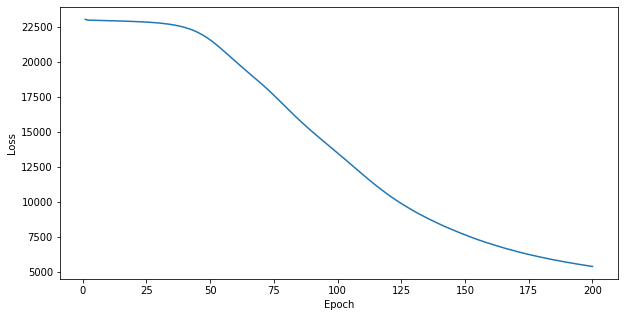

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(1,201),history['val_loss'])
plt.show()

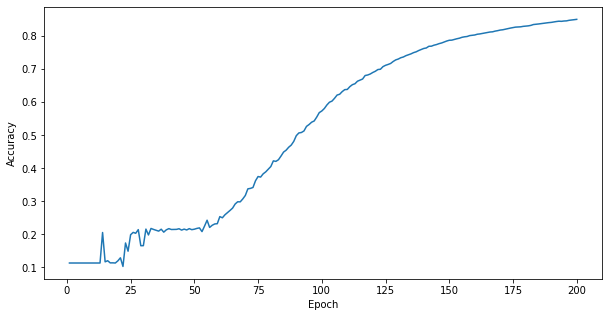

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(np.arange(1,201),history['val_acc'])
plt.show()